In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt

import initials as init

#Imports for c code
from ctypes import *
so_file = "C:/Users/ante_/Documents/Kandidatarbete/autonomous_unicycle/STM32/regulator.so"
reg = CDLL(so_file)

so_file_filter = "C:/Users/ante_/Documents/Kandidatarbete/autonomous_unicycle/STM32/kalman_filter.so"
c_kalman = CDLL(so_file_filter)

INIT_STATE = init.INIT_STATE
DEFAULT_PARAMETERS = init.DEFAULT_PARAMETERS
# DEFAULT_REG = NullRegulator(params=DEFAULT_PARAMETERS)
DEFAULT_KALMAN = init.DEFAULT_KALMAN
DEFAULT_REG = init.DEFAULT_REG
DEFAULT_KALMAN_GAIN = init.DEFAULT_KALMAN_GAIN

In [2]:
npfile = np.load('../sensor_data/last-run.npz')
kalman_data = npfile['kalman_data']
sensor_data = npfile['sensor_data']

sim_wheel_sensor = np.load('../sensor_data/sim_wheel_pos_d.npy')
#sim_wheel_sensor = sim_sensor_file['x_ds']

print(sensor_data.shape)

(10003, 4)


In [3]:
steps = sim_wheel_sensor.size
sensor_with_noise = np.random.normal(0, 0.05,size=(sim_wheel_sensor.size,1))
sin_array = np.sin(np.linspace(-np.pi, np.pi,3000))

num_repeat = int(steps/3000)
sin_array_repeat = np.tile(sin_array, num_repeat).reshape(num_repeat*3000,1) 
sin_array_repeat *= 0.01

#a = np.add(sensor_low_freq_noise, sensor_with_noise)
sim_wheel_sensor_noise = np.add(sim_wheel_sensor.reshape(sim_wheel_sensor.size,1), sin_array_repeat)

In [4]:
kalman_out = np.zeros(steps)
c_kalman_vel = c_kalman.wheel_velocity_kalman_filter_predict
c_kalman_vel.restype = c_float  # Set output type from c code

for i in range(0,steps):
    dt = 0.001
    kalman_out[i] = c_kalman_vel(c_float(dt))
    
    c_kalman.wheel_velocity_kalman_filter_update(c_float(sim_wheel_sensor_noise[i]), c_float(dt));

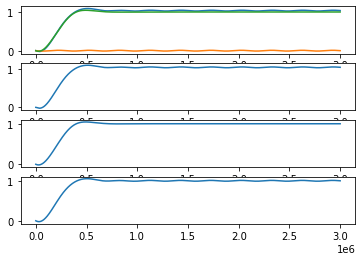

In [5]:
time_axis = np.linspace(0, steps/0.01, steps)

fig, axs = plt.subplots(4)
axs[0].plot(time_axis, kalman_out,time_axis, sin_array_repeat, time_axis, sim_wheel_sensor)
axs[1].plot(time_axis, kalman_out)
axs[2].plot(time_axis, sim_wheel_sensor)
axs[3].plot(time_axis, sim_wheel_sensor_noise)
#axs[1].plot(time_axis, sim_wheel_sensor_noise, label= "Accleration with noise")
#%matplotlib qt
plt.show()

In [10]:
dt = 0.01
time = 10
num_samples = sensor_data.shape[0]

time_axis = np.linspace(0,time, num=num_samples).reshape(num_samples,1)
sensor_with_noise = np.random.normal(0, 0.05,size=(num_samples,1))




In [12]:
fig, axs = plt.subplots(3)
axs[0].plot(sensor_data.T[0], sensor_data.T[1], label= "Accleration with noise")
axs[1].plot(sensor_data.T[0], sensor_data.T[2], label= "Accleration with noise")
axs[2].plot(sensor_data.T[0], sensor_data.T[3], label= "Accleration with noise")

#%matplotlib qt
fig.legend()
plt.show()

In [14]:
print(np.var(sensor_data.T[1][35:60]), np.var(sensor_data.T[2][35:60]), np.var(sensor_data.T[3][35:60]))

0.0003563362117394704 6.486216906924332e-05 1.3907965633667632e-06
